In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import zipfile
import os
import joblib
import requests

In [42]:
# Устанавливаем случайное зерно для воспроизводимости
np.random.seed(42)

In [43]:
# Загрузка и извлечение данных
url = 'https://archive.ics.uci.edu/static/public/222/bank+marketing.zip'
zip_path = 'bank+marketing.zip'
response = requests.get(url, verify=False)  # Отключение проверки сертификатов

with open(zip_path, 'wb') as f:
    f.write(response.content)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('bank+marketing')

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'archive.ics.uci.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [44]:
# Указываем путь к CSV файлу
csv_path = os.path.join('bank+marketing', 'bank', 'bank-full.csv')
print(f"Файл сохранен по пути: {csv_path}")

# Чтение данных из CSV файла
df = pd.read_csv(csv_path, sep=';')
print(df.head())

Файл сохранен по пути: bank+marketing/bank/bank-full.csv
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [45]:
# Устанавливаем случайное зерно для воспроизводимости
np.random.seed(42)

# Загрузка и извлечение данных
url = 'https://archive.ics.uci.edu/static/public/222/bank+marketing.zip'
zip_path = 'bank+marketing.zip'
response = requests.get(url, verify=False)  # Отключение проверки сертификатов

with open(zip_path, 'wb') as f:
    f.write(response.content)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('bank+marketing')

# Указываем путь к CSV файлу
csv_path = os.path.join('bank+marketing', 'bank', 'bank-full.csv')
print(f"Файл сохранен по пути: {csv_path}")

# Чтение данных из CSV файла
df = pd.read_csv(csv_path, sep=';')
print(df.head())

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'archive.ics.uci.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Файл сохранен по пути: bank+marketing/bank/bank-full.csv
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [46]:
# Проверка на пропущенные значения
missing_values = df.isnull().sum()
print("Пропущенные значения:\n", missing_values)

Пропущенные значения:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [47]:
# Выбираем столбцы для анализа
columns_to_use = [
    'age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 
    'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'
]
df = df[columns_to_use]

# Повторный просмотр данных
print(df.head())

# Кодируем целевую переменную: yes = 1, no = 0
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Проверим, как теперь выглядит столбец 'y'
print(df['y'].value_counts())

# Разделяем данные: 60% для тренировки, 20% для валидации, 20% для теста
train_data, temp_data = train_test_split(df, test_size=0.4, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Проверим размеры наборов
print(f"Тренировочные данные: {train_data.shape}")
print(f"Валидационные данные: {val_data.shape}")
print(f"Тестовые данные: {test_data.shape}")




   age           job  marital  education  balance housing  contact  day month  \
0   58    management  married   tertiary     2143     yes  unknown    5   may   
1   44    technician   single  secondary       29     yes  unknown    5   may   
2   33  entrepreneur  married  secondary        2     yes  unknown    5   may   
3   47   blue-collar  married    unknown     1506     yes  unknown    5   may   
4   33       unknown   single    unknown        1      no  unknown    5   may   

   duration  campaign  pdays  previous poutcome   y  
0       261         1     -1         0  unknown  no  
1       151         1     -1         0  unknown  no  
2        76         1     -1         0  unknown  no  
3        92         1     -1         0  unknown  no  
4       198         1     -1         0  unknown  no  
y
0    39922
1     5289
Name: count, dtype: int64
Тренировочные данные: (27126, 15)
Валидационные данные: (9042, 15)
Тестовые данные: (9043, 15)


In [48]:
# Разделяем данные
train_data, temp_data = train_test_split(df, test_size=0.4, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Указываем числовые и категориальные признаки
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_cols = ['job', 'marital', 'education', 'housing', 'contact', 'poutcome']

# Применяем One-Hot кодирование к категориальным признакам
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_train_encoded = encoder.fit_transform(train_data[categorical_cols])
X_val_encoded = encoder.transform(val_data[categorical_cols])
X_test_encoded = encoder.transform(test_data[categorical_cols])

# Масштабируем числовые переменные
scaler = StandardScaler()
X_train_numeric_scaled = scaler.fit_transform(train_data[numeric_cols])
X_val_numeric_scaled = scaler.transform(val_data[numeric_cols])
X_test_numeric_scaled = scaler.transform(test_data[numeric_cols])

# Объединяем закодированные переменные с масштабированными числовыми переменными
X_train_final = np.hstack((X_train_numeric_scaled, X_train_encoded))
X_val_final = np.hstack((X_val_numeric_scaled, X_val_encoded))
X_test_final = np.hstack((X_test_numeric_scaled, X_test_encoded))

# Целевые переменные
y_train = train_data['y']
y_val = val_data['y']
y_test = test_data['y']

In [49]:
# Обучаем модель логистической регрессии
model = LogisticRegression(max_iter=2000)
model.fit(X_train_final, y_train)

# Предсказываем значения для тестовой выборки
y_pred = model.predict(X_test_final)

# Оцениваем точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Рассчитываем взаимную информацию
mutual_info = mutual_info_classif(X_train_final, y_train)

# Преобразуем результат в DataFrame
mutual_info_df = pd.DataFrame(mutual_info, index=np.arange(X_train_final.shape[1]), columns=['Mutual Info']).sort_values(by='Mutual Info', ascending=False)

Accuracy: 0.90


    Mutual Info
3      0.069467
5      0.028742
27     0.024005
1      0.019572
28     0.016557


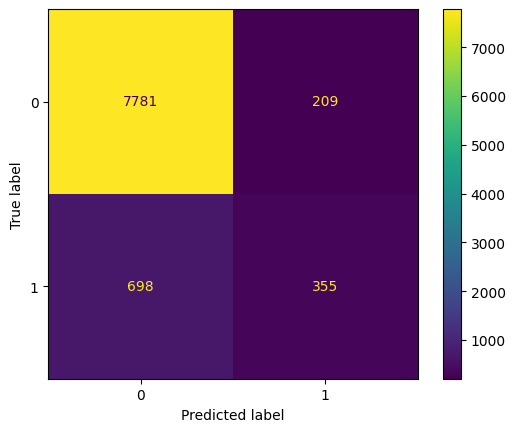

In [50]:
# Выводим матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

# Выводим таблицу с взаимной информацией
print(mutual_info_df.head())

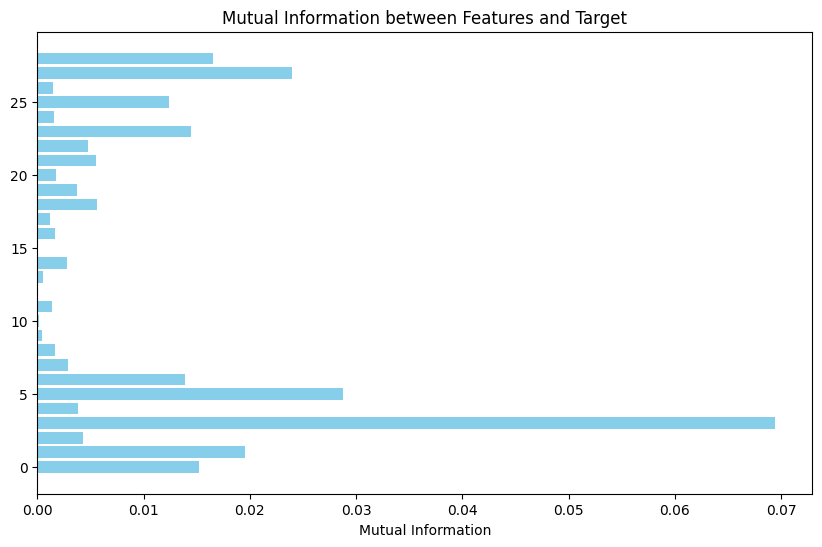

In [51]:
# Визуализируем взаимную информацию
plt.figure(figsize=(10, 6))
plt.barh(mutual_info_df.index, mutual_info_df['Mutual Info'], color='skyblue')
plt.xlabel('Mutual Information')
plt.title('Mutual Information between Features and Target')
plt.show()

# Сохранение модели
joblib.dump(model, 'logistic_regression_model.pkl')

# Загрузка модели
loaded_model = joblib.load('logistic_regression_model.pkl')

# Прогнозирование с использованием загруженной модели
y_pred_loaded = loaded_model.predict(X_test_final)

1: unknown

2: age и balance

3: contact

4: 0.9

5: marital

6: 1